# Formula 1 - What Wins Races?

### About the Dataset



In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('default')

# cicuits.csv

In [55]:
circuits_df = pd.read_csv("circuits.csv")
circuits_df.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


In [56]:
circuits_df.columns

Index(['circuitId', 'circuitRef', 'name', 'location', 'country', 'lat', 'lng',
       'alt', 'url'],
      dtype='object')

In [57]:
circuits_df.isnull().sum()

circuitId     0
circuitRef    0
name          0
location      0
country       0
lat           0
lng           0
alt           0
url           0
dtype: int64

# constructors

In [58]:
constructors_df = pd.read_csv("constructors.csv")

# Map historical constructor names to current team names (best-effort via keywords)
def map_to_current_team(name):
    n = str(name).lower()
    if 'mercedes' in n:
        return 'Mercedes'
    if 'ferrari' in n:
        return 'Ferrari'
    if 'red bull' in n or 'redbull' in n:
        return 'Red Bull'
    if 'alpha' in n and 'tauri' in n:
        return 'AlphaTauri'
    if 'toro' in n or 'scuderia toro' in n:
        return 'AlphaTauri'
    if 'mclaren' in n:
        return 'McLaren'
    if 'williams' in n:
        return 'Williams'
    if 'alpine' in n or 'renault' in n or 'benetton' in n:
        return 'Alpine'
    if 'aston' in n or 'racing point' in n or 'force india' in n:
        return 'Aston Martin'
    if 'haas' in n:
        return 'Haas'
    if 'sauber' in n or 'alfa' in n:
        return 'Alfa Romeo'
    if 'lotus' in n:
        return 'Lotus'
    # fallback to original name
    return name

constructors_df['current_team'] = constructors_df['name'].apply(map_to_current_team)

# Mapping table: historical name -> current team
mapping_df = constructors_df[['name','current_team']].drop_duplicates().reset_index(drop=True)
mapping_df.head(200)

,name,current_team
0,McLaren,McLaren
1,BMW Sauber,Alfa Romeo
2,Williams,Williams
3,Renault,Alpine
4,Toro Rosso,AlphaTauri
...,...,...
195,McLaren-Alfa Romeo,McLaren
196,March-Alfa Romeo,Alfa Romeo
197,March-Ford,March-Ford
198,Lotus-Pratt &amp; Whitney,Lotus


In [59]:
constructors_df.isnull().sum()

constructorId     0
constructorRef    0
name              0
nationality       0
url               0
current_team      0
dtype: int64

# drivers

In [60]:
drivers_df = pd.read_csv("drivers.csv")
drivers_df.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [61]:
drivers_df.isnull().sum()

driverId       0
driverRef      0
number         0
code           0
forename       0
surname        0
dob            0
nationality    0
url            0
dtype: int64

# qualifying

In [62]:
qualifying_df = pd.read_csv("qualifying.csv")
qualifying_df.head()

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236


In [63]:
qualifying_df.isnull().sum()

qualifyId         0
raceId            0
driverId          0
constructorId     0
number            0
position          0
q1                0
q2               22
q3               46
dtype: int64

In [64]:
qualifying_df['q2'] = qualifying_df['q2'].fillna("Unknown")
qualifying_df['q3'] = qualifying_df['q3'].fillna("Unknown")

In [65]:
qualifying_df.isnull().sum()

qualifyId        0
raceId           0
driverId         0
constructorId    0
number           0
position         0
q1               0
q2               0
q3               0
dtype: int64

# races

In [66]:
races_df = pd.read_csv("races.csv")
races_df.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [67]:
races_df.isnull().sum()

raceId         0
year           0
round          0
circuitId      0
name           0
date           0
time           0
url            0
fp1_date       0
fp1_time       0
fp2_date       0
fp2_time       0
fp3_date       0
fp3_time       0
quali_date     0
quali_time     0
sprint_date    0
sprint_time    0
dtype: int64

# results

In [68]:
results_df = pd.read_csv("results.csv")
results_df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [69]:
results_df.isnull().sum()

resultId           0
raceId             0
driverId           0
constructorId      0
number             0
grid               0
position           0
positionText       0
positionOrder      0
points             0
laps               0
time               0
milliseconds       0
fastestLap         0
rank               0
fastestLapTime     0
fastestLapSpeed    0
statusId           0
dtype: int64

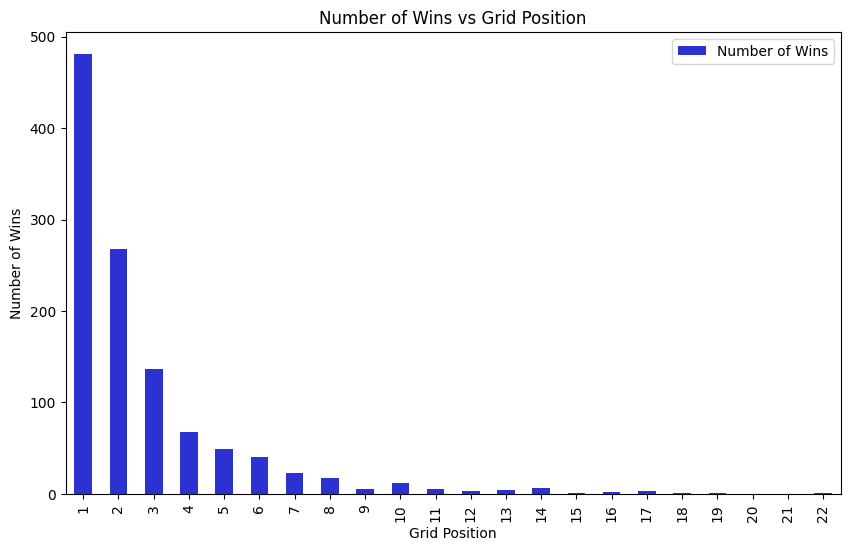

In [70]:
# Count wins by grid position
gridPos_vs_winning = results_df.groupby('grid')['positionOrder'].apply(lambda x: (x == 1).sum()).reset_index()
gridPos_vs_winning.columns = ['Grid Position', 'Number of Wins']
# Keep only possible grid positions (1 through 22)
gridPos_vs_winning = gridPos_vs_winning[gridPos_vs_winning['Grid Position'].between(1, 22)]
gridPos_vs_winning = gridPos_vs_winning.sort_values('Grid Position')
# Plot
gridPos_vs_winning.plot(x='Grid Position', y='Number of Wins', kind='bar', figsize=(10,6), color="#2C31D2")
plt.title('Number of Wins vs Grid Position')
plt.xlabel('Grid Position')
plt.ylabel('Number of Wins')
plt.show()

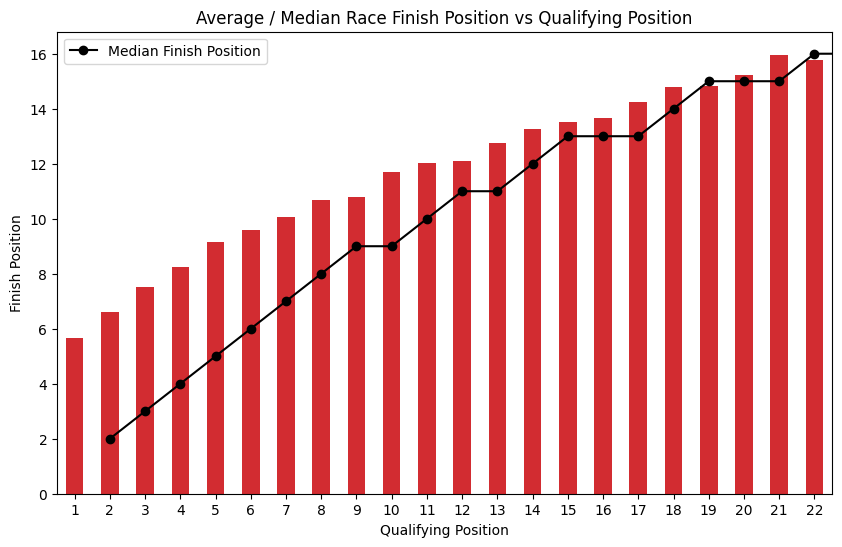

In [71]:
# Qualifying Position vs Race Finish (average)
# Make numeric and drop non-finishers
results_df['grid'] = pd.to_numeric(results_df['grid'], errors='coerce')
results_df['positionOrder'] = pd.to_numeric(results_df['positionOrder'], errors='coerce')
results_clean = results_df.dropna(subset=['grid', 'positionOrder']).copy()

# Exclude impossible grid values and non-positive finish positions
results_clean = results_clean[results_clean['grid'].between(1, 22) & (results_clean['positionOrder'] > 0)]

# calculate mean and median finish position per qualifying spot
agg = results_clean.groupby('grid')['positionOrder'].agg(['mean', 'median']).reset_index()
agg.columns = ['Qualifying Position', 'Mean Finish Position', 'Median Finish Position']
agg = agg.sort_values('Qualifying Position')

# reindex to make sure positions 1-22 appear (missing -> NaN)
full_idx = pd.DataFrame({'Qualifying Position': range(1, 23)})
agg = full_idx.merge(agg, on='Qualifying Position', how='left')

# Plot mean (and median as a line)
ax = agg.plot(x='Qualifying Position', y='Mean Finish Position', kind='bar', figsize=(10,6), color="#D22C31", legend=False)
agg.plot(x='Qualifying Position', y='Median Finish Position', kind='line', marker='o', color='black', secondary_y=False, ax=ax)
plt.title('Average / Median Race Finish Position vs Qualifying Position')
plt.xlabel('Qualifying Position')
plt.ylabel('Finish Position')
plt.legend(['Median Finish Position'])
plt.show()

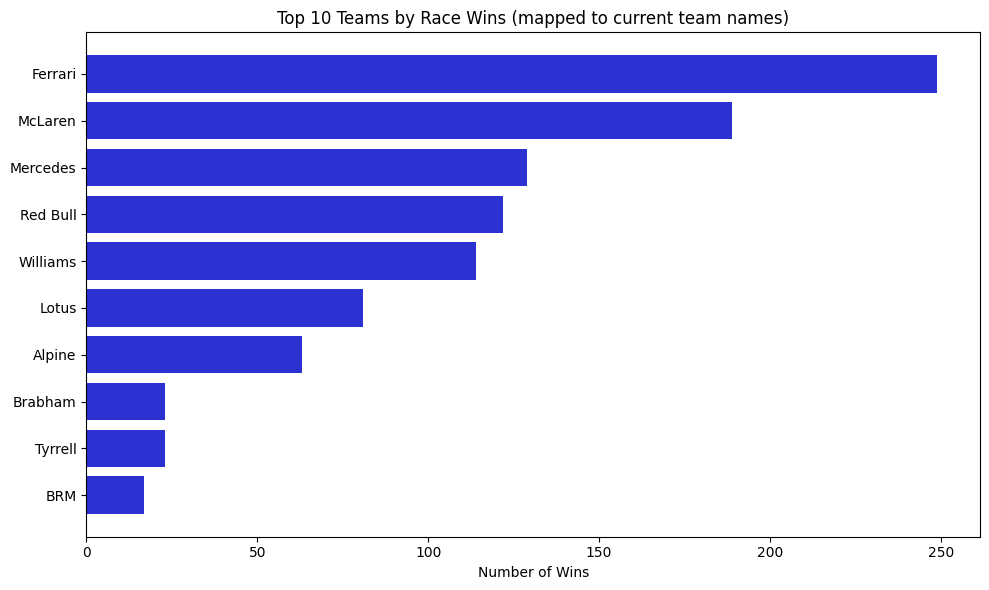

In [72]:
# Do wins cluster around current team names? (plot top 10)
wins = results_df[results_df['positionOrder'] == 1].copy()
constructor_wins = wins.groupby('constructorId')['raceId'].count().reset_index(name='wins')

# map constructorId to current team names
try:
    constructors_lookup = constructors_df[['constructorId','current_team']]
except Exception:
    constructors_lookup = pd.read_csv('constructors.csv', usecols=['constructorId','name'])
    constructors_lookup['current_team'] = constructors_lookup['name']

constructor_wins = constructor_wins.merge(constructors_lookup, on='constructorId', how='left')
constructor_wins['current_team'] = constructor_wins['current_team'].fillna(constructor_wins['constructorId'].astype(str))

# Aggregate wins by current team name
team_wins = constructor_wins.groupby('current_team')['wins'].sum().reset_index()
team_wins = team_wins.sort_values('wins', ascending=False)

# Select top 10 and plot as horizontal bar chart for readability
top10 = team_wins.head(10).copy()
if top10.empty:
    print('No wins found (check that `results_df` contains results and `positionOrder` == 1).')
else:
    top10 = top10[::-1]  # reverse for plotting from top to bottom
    plt.figure(figsize=(10,6))
    plt.barh(top10['current_team'], top10['wins'], color="#2C31D2")
    plt.xlabel('Number of Wins')
    plt.title('Top 10 Teams by Race Wins (mapped to current team names)')
    plt.tight_layout()
    plt.show()

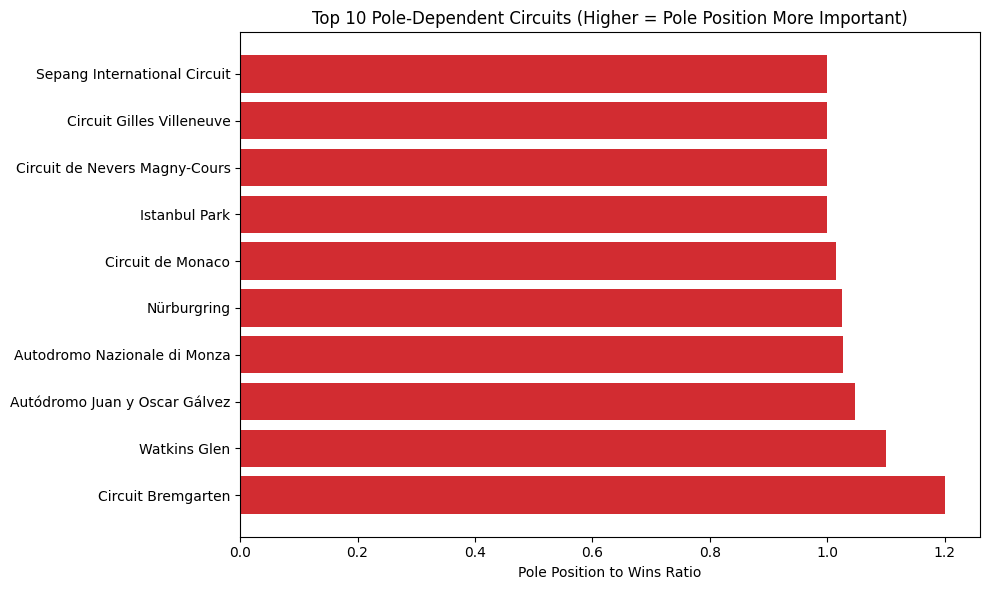

                    circuit_label  wins  poles  pole_win_ratio
64             Circuit Bremgarten     5      6        1.200000
44                   Watkins Glen    20     22        1.100000
23  Autódromo Juan y Oscar Gálvez    21     22        1.047619
13   Autodromo Nazionale di Monza    74     76        1.027027
19                    Nürburgring    41     42        1.024390
5               Circuit de Monaco    70     71        1.014286
4                   Istanbul Park     9      9        1.000000
7   Circuit de Nevers Magny-Cours    18     18        1.000000
6       Circuit Gilles Villeneuve    43     43        1.000000
1    Sepang International Circuit    19     19        1.000000


In [73]:
# Are some tracks more "pole-dependent" than others?

# Merge results with races to get circuitId
merged_df = results_df.merge(races_df[['raceId', 'circuitId']], on='raceId', how='left')

# Count wins and pole positions per circuit
wins = merged_df[merged_df['positionOrder'] == 1].copy()
pole_positions = merged_df[merged_df['grid'] == 1].copy()

circuit_wins = wins.groupby('circuitId')['raceId'].count().reset_index(name='wins')
circuit_poles = pole_positions.groupby('circuitId')['raceId'].count().reset_index(name='poles')

circuit_stats = circuit_wins.merge(circuit_poles, on='circuitId', how='outer').fillna(0)

# Merge with circuit names
circuit_stats = circuit_stats.merge(circuits_df[['circuitId', 'name']], on='circuitId', how='left')
circuit_stats['circuit_label'] = circuit_stats['name'].fillna(circuit_stats['circuitId'].astype(str))

# Avoid division by zero
circuit_stats['pole_win_ratio'] = circuit_stats.apply(
    lambda row: row['poles'] / row['wins'] if row['wins'] > 0 else np.nan, axis=1
)

# Sort and get top 10 by pole-win ratio
top_pole_dependent = circuit_stats.dropna(subset=['pole_win_ratio']).sort_values('pole_win_ratio', ascending=False).head(10)

# Plot as horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_pole_dependent['circuit_label'], top_pole_dependent['pole_win_ratio'], color="#D22C31")
plt.xlabel('Pole Position to Wins Ratio')
plt.title('Top 10 Pole-Dependent Circuits (Higher = Pole Position More Important)')
plt.tight_layout()
plt.show()

print(top_pole_dependent[['circuit_label', 'wins', 'poles', 'pole_win_ratio']])

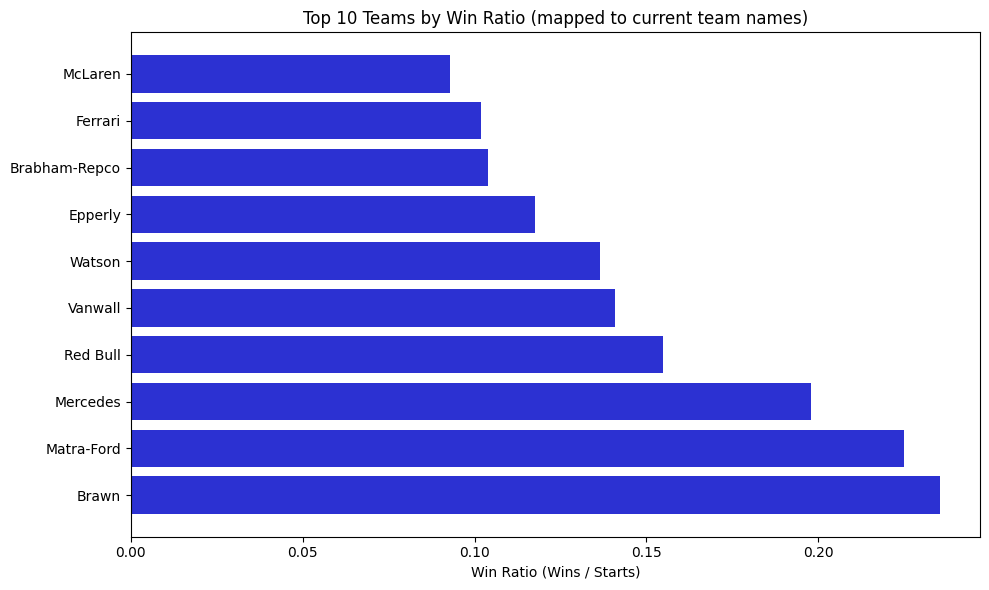

In [75]:
# Which teams convert starts into wins? (aggregate by current team name)

# Merge results with constructors to get current constructor names
merged_df = results_df.merge(constructors_df[['constructorId', 'current_team']], on='constructorId', how='left')
merged_df['current_team'] = merged_df['current_team'].fillna(merged_df['constructorId'].astype(str))

# Count wins and starts per current team
wins = merged_df[merged_df['positionOrder'] == 1].copy()
starts = merged_df.groupby('current_team')['raceId'].count().reset_index(name='starts')
wins_count = wins.groupby('current_team')['raceId'].count().reset_index(name='wins')

# Merge wins and starts and calculate win ratio
constructor_stats = wins_count.merge(starts, on='current_team', how='outer').fillna(0)
constructor_stats['win_ratio'] = constructor_stats.apply(lambda row: row['wins'] / row['starts'] if row['starts'] > 0 else np.nan, axis=1)

# Sort and get top 10 by win ratio
top_winners = constructor_stats.dropna(subset=['win_ratio']).sort_values('win_ratio', ascending=False).head(10)

# Plot as horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_winners['current_team'], top_winners['win_ratio'], color="#2C31D2")
plt.xlabel('Win Ratio (Wins / Starts)')
plt.title('Top 10 Teams by Win Ratio (mapped to current team names)')
plt.tight_layout()
plt.show()